In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump
import plotly.express as px
import missingno as msno
import plotly.graph_objects as go
import cufflinks as cf

# library from preprocessing Module.
from sklearn.preprocessing import  OneHotEncoder
from sklearn.preprocessing import StandardScaler, OrdinalEncoder


# library from model selection Module
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import  DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix

In [86]:
pd.set_option("display.max_columns", None)

# Loading the Dataset

In [87]:
df = pd.read_csv('/Users/ramaniravipati/Desktop/Banking Chrun Project/Customerchurn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [88]:
# Checking the size of a dataframe
df.shape

(7043, 21)

In [89]:
# Checking the non-null count, datatype of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [90]:
# Checking the descriptive statistics of the dataframe - To identify any outliers or unusual values. 
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Data Visualization

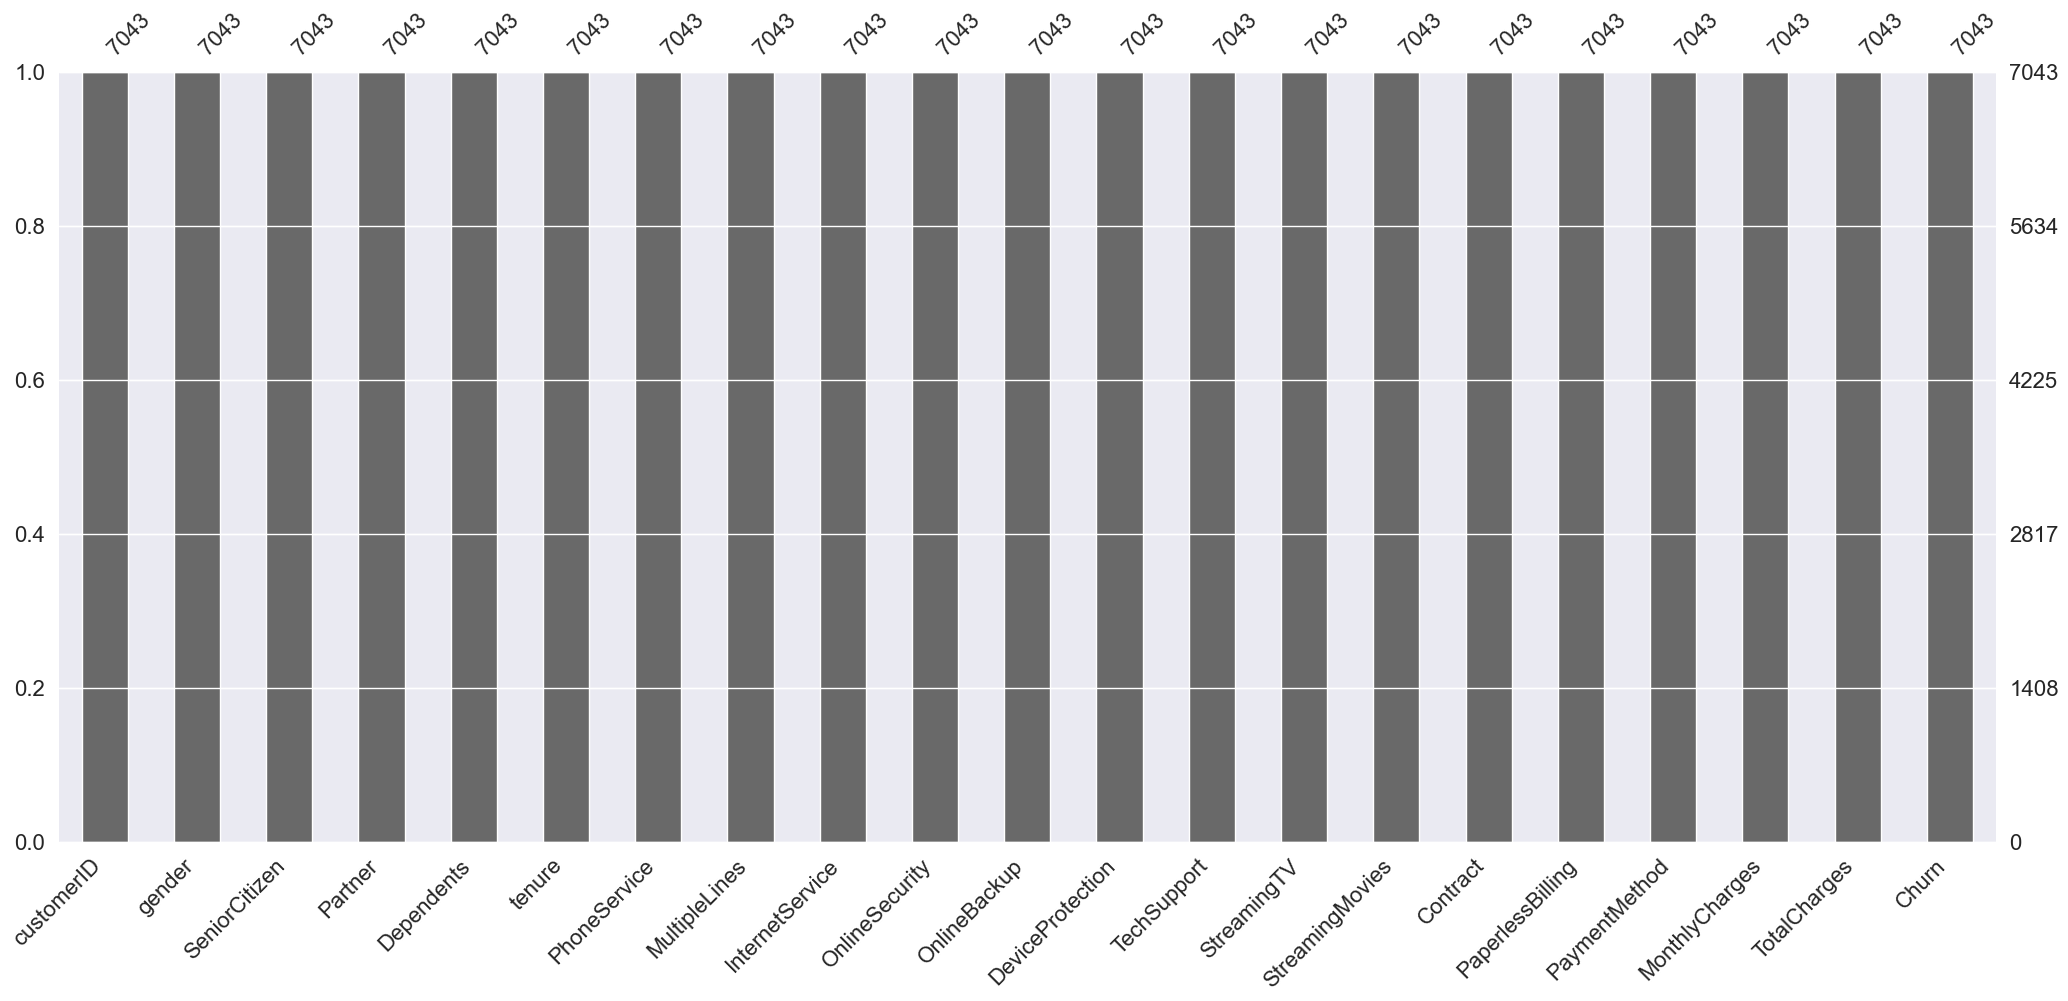

In [91]:
# Visualize missing values in a dataset as a bar
msno.bar(df)
plt.show()

# Distribution of churn

In [92]:
# Trying to see the churn status those with Yes or No
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

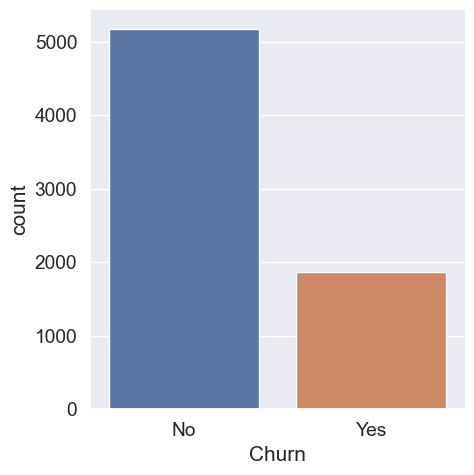

In [93]:
sns.catplot(data=df, x="Churn", kind="count")

## We see that the proportion for the Yes category is very less as compared to No.

## Distribution of Gender

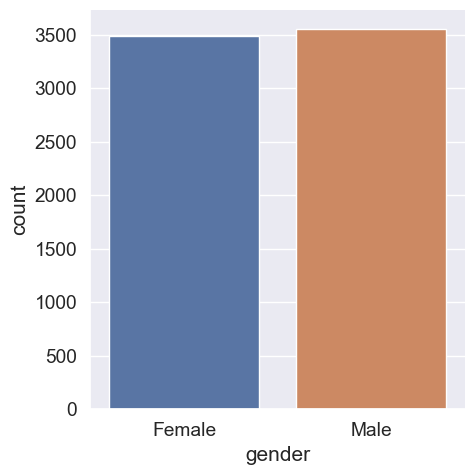

In [94]:
sns.catplot(data=df, x="gender", kind="count");

In [95]:
#Churn yes dataset
churn_yes = pd.DataFrame(df.query('Churn == "Yes"'))

#Churn no dataset
churn_no = pd.DataFrame(df.query('Churn == "No"'))

## Distribution of Senior Citizen

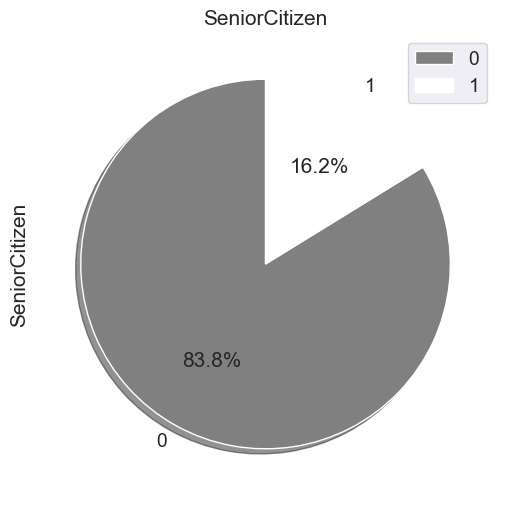

In [182]:
color = ['gray', 'white']
df['SeniorCitizen'].value_counts().plot(kind='pie',
                                        colors = color,
                                        figsize=(8,6),
                                        autopct='%1.1f%%',
                                        shadow = True,
                                        startangle=90)
plt.title("SeniorCitizen")
plt.legend()
plt.show()

## According to the data the analysis shows 16.2% customers were senior citizens while the remaining 74% were other ages.

In [195]:
color= {"Yes": 'black', "No": 'grey'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", barmode="group", color_discrete_map=color)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.update_layout(title='Chrun distribuiton with SeniorCitizen')
fig.show()

## The graph shows that the  senior citizen are likely very less and most of the senior citizens churn

## Distribution of tenure

# Here the only customers who have left the company will have their tenure period displayed.

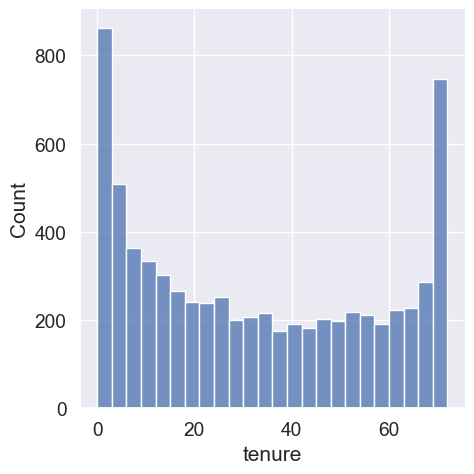

In [98]:

sns.displot(df, x="tenure", binwidth=3);

In [99]:
X = pd.DataFrame(churn_yes['tenure'].value_counts().reset_index())
# Plotting
fig = px.scatter(X, x="tenure",y='index',log_x=True, width=600)
fig.update_layout(title='Tenure')
fig.update_xaxes(title='Days')
fig.update_yaxes(title='Count')
fig.show()

Here most of my customers are between 0 -100 days and one of the outlier on the 380th day. With a count of 72, the longest tenure period is 6 days.

## Distribution of Internet Service

## I'm trying to take customer data to check the customers who left and those who stayed and compare the results.

In [100]:
InternetService=pd.DataFrame(churn_yes['InternetService'].value_counts().reset_index())

InternetService.rename(columns={'index':'InternetService_churn_yes','InternetService':'counts_yes'},inplace=True)

InternetService_no=pd.DataFrame(churn_no['InternetService'].value_counts().reset_index())

InternetService_no.rename(columns={'index':'InternetServicechurn_no','InternetService':'counts_no'},inplace=True)

InternetService_status=pd.concat([InternetService,InternetService_no],axis=1)
InternetService_status

,InternetService_churn_yes,counts_yes,InternetServicechurn_no,counts_no
0,Fiber optic,1297,DSL,1962
1,DSL,459,Fiber optic,1799
2,No,113,No,1413


In [101]:
fig= go.Figure()
#Churn_yes
fig.add_trace(go.Bar(name='Churn Yes',
                     x=['Fiber optic','DSL','No'],
                     y=[1297,459,113],
                     marker_color='blue'))
#Churn_no
fig.add_trace(go.Bar(name='Churn No', 
                     x=['Fiber optic','DSL','No'], 
                     y=[1799,1962,1413], 
                     marker_color='lightblue'))
fig.update_layout(title='InternetService',
                 autosize=False,
                 width=500,
                 height=500)
fig.update_xaxes(title='Different Internet Services')
fig.update_yaxes(title='Counts' )
fig.show()

Here the customer with InternetService Fiber optic has high chance to leave the company. 
Customers with DSL internet service have the highest rate of staying and a lower rate of leaving. 
This gives us the impression that DSL performs better than Fibre Optics.

## Distribution of Payment Method

In [140]:
cf.go_offline()
cf.set_config_file(offline = False, world_readable = True)
df['PaymentMethod'].iplot(kind='hist',
                          xTitle='PaymentMethod',
                          linecolor='black',
                          yTitle='count',
                          color='grey',
                          dimensions = (600,600),
                          title='Payment Mode Distribution')

## Distribution of Contracts

In [134]:
cf.go_offline()
cf.set_config_file(offline = False, world_readable = True)
df['Contract'].iplot(kind='hist',
                     xTitle='Contract',
                     linecolor='black',
                     yTitle='count',
                     color='grey',
                     size=20,
                     dimensions=(600,600),
                     title='Payment Mode Distribution')

In [104]:
con=pd.DataFrame(churn_yes['Contract'].value_counts().reset_index())

con.rename(columns={'index':'contracts_churn_yes','Contract':'counts_yes'},inplace=True)

con_no=pd.DataFrame(churn_no['Contract'].value_counts().reset_index())

con_no.rename(columns={'index':'contracts_churn_no','Contract':'counts_no'},inplace=True)

contract_status=pd.concat([con,con_no],axis=1)
contract_status

,contracts_churn_yes,counts_yes,contracts_churn_no,counts_no
0,Month-to-month,1655,Month-to-month,2220
1,One year,166,Two year,1647
2,Two year,48,One year,1307




Here I'm tryiing to examine the various contracts in which the customers were enrolled for churn yes and churn no.



In [103]:
fig= go.Figure()
#Churn_yes
fig.add_trace(go.Bar(name='Churn Yes',
                     x=['Month-to-month', 'Two year', 'One year'],
                     y=[3875, 1695, 1473],
                     marker_color='blue'))
#Churn_no
fig.add_trace(go.Bar(name='Churn No', 
                     x=['Month-to-month', 'Two year', 'One year'], 
                     y=[2220, 1647, 1307], 
                     marker_color='lightblue'))
fig.update_layout(title='Contract',
                  autosize=False,
                  width=500,
                  height=500)
fig.update_xaxes(title='Different Contract')
fig.update_yaxes(title='Counts')
fig.show()

## Distribution of PhoneService

In [ ]:
sns.catplot(data=df, x="PhoneService", kind="count");

## Trying to examine the PhoneService in which the customers were enrolled for churn yes and churn no.

In [133]:
color = {"Yes": 'blue', "No": 'lightblue'}
fig = px.histogram(df, x="Churn", color="PhoneService", barmode="group", color_discrete_map=color)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.update_layout(title='Chrun distribuiton with Phone Service')
fig.show()

##This shows only small percentage of customers do not have phone service and one-third are more likely to churn.

## Data prediction starts here ...

## CustomerID column isn't used , so dropping it!

In [106]:
df.drop(columns = ['customerID'], axis=1, inplace=True)

In [107]:
cols = ['gender','Partner','Dependents','PhoneService',	'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','TotalCharges','PaperlessBilling','PaymentMethod']

ord = OrdinalEncoder()
ord.fit(df[cols])
df[cols] = ord.transform(df[cols])
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,No
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,No
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,Yes
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,No
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,Yes
5,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,6104.0,Yes
6,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1550.0,No
7,0.0,0,0.0,0.0,10,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,29.75,2609.0,No
8,0.0,0,1.0,0.0,28,1.0,2.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,1.0,2.0,104.80,2646.0,Yes
9,1.0,0,0.0,1.0,62,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,56.15,3022.0,No


In [108]:
Churn_ohe = OneHotEncoder(drop='first', sparse=False, dtype=np.int32)
Churn_dummies = Churn_ohe.fit_transform(df[['Churn']])
df.drop(columns=['Churn'],inplace=True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [109]:
df = pd.concat([df, pd.DataFrame(Churn_dummies)], axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,0
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1


In [110]:
df.rename(columns={0:"Churn"}, inplace=True)

In [111]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1597.0,0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,5698.0,0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,2994.0,0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,2660.0,1


In [112]:
df.head().T

,0,1,2,3,4
gender,0.00,1.00,1.00,1.0,0.0
SeniorCitizen,0.00,0.00,0.00,0.0,0.0
Partner,1.00,0.00,0.00,0.0,0.0
Dependents,0.00,0.00,0.00,0.0,0.0
tenure,1.00,34.00,2.00,45.0,2.0
PhoneService,0.00,1.00,1.00,0.0,1.0
MultipleLines,1.00,0.00,0.00,1.0,0.0
InternetService,0.00,0.00,0.00,0.0,1.0
OnlineSecurity,0.00,2.00,2.00,2.0,0.0
OnlineBackup,2.00,0.00,2.00,0.0,0.0


## Taking out the clean data to csv file

In [ ]:
df.to_csv('/Users/ramaniravipati/Desktop/Banking Chrun Project/cleaned_Dataset.csv',index=None)

In [ ]:
# Printing unique value counts for each variable
for i in df.columns:
    print(f"----{i}----\n")
    print(df[i].value_counts())
    print('='*35)

First, we create a variable X to store the dataset’s independent attributes. In addition, we define a variable y to hold only the target variable.Then, from the sklearn.model_selection package, we can use the train_test_split function to generate both the training and testing sets.

In [ ]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=1)
print('X_train:',len(X_train))
print('X_test:',len(X_test))
print('y_train',len(y_train))
print('y_test',len(y_test))

## Logistic Regression

In [180]:
model = make_pipeline(StandardScaler(),LogisticRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test,y_test)
print("Logistic Regression accuracy: ",accuracy)


Logistic Regression accuracy:  0.8097491717936584


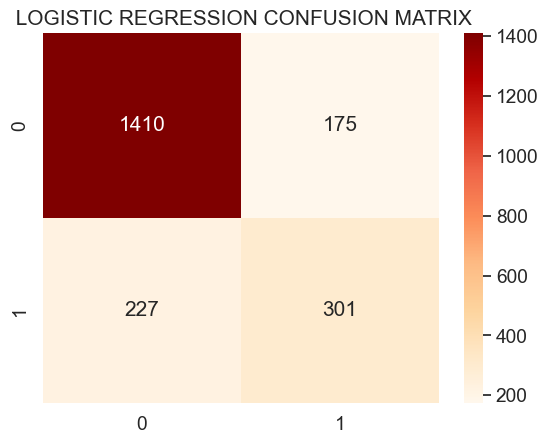

In [181]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d",cmap='OrRd')
plt.title(" LOGISTIC REGRESSION CONFUSION MATRIX");

In [179]:
print("classification_report")
print(classification_report(y_test, y_pred))

classification_report
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1585
           1       0.63      0.54      0.58       528

    accuracy                           0.81      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



## Decision Tree

In [115]:
model = make_pipeline(StandardScaler(), DecisionTreeClassifier())
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test,y_test)
print("Decision Tree accuracy: ",accuracy)

Decision Tree accuracy:  0.7259820160908661


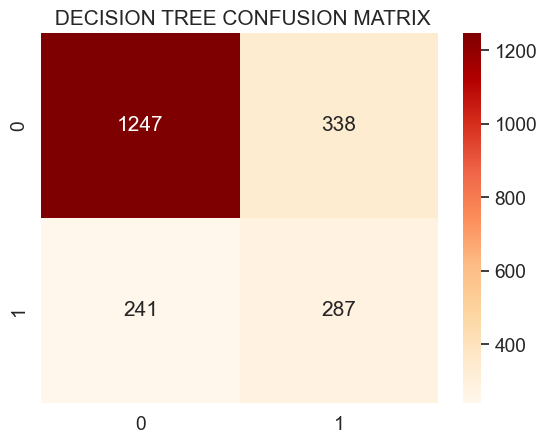

In [116]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d",cmap='OrRd')
plt.title(" DECISION TREE CONFUSION MATRIX");

In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1585
           1       0.46      0.54      0.50       528

    accuracy                           0.73      2113
   macro avg       0.65      0.67      0.65      2113
weighted avg       0.74      0.73      0.73      2113



## Random Forest

In [169]:
model = make_pipeline(StandardScaler(), RandomForestClassifier())
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test,y_test)
print("Random forest accuracy :",accuracy)
#dump(model, 'random_forest_model.pk')

Random forest accuracy : 0.807382867960246


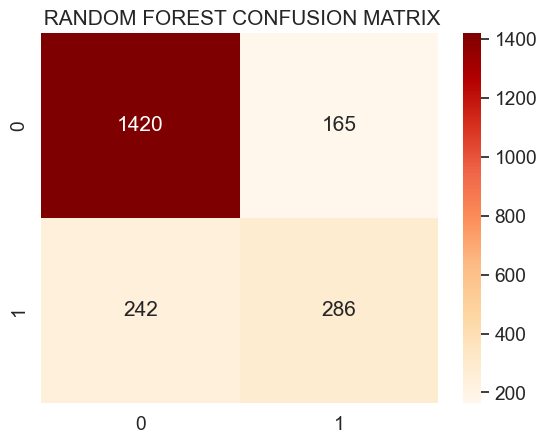

In [170]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d",cmap='OrRd')
plt.title(" RANDOM FOREST CONFUSION MATRIX");

In [173]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1585
           1       0.63      0.54      0.58       528

    accuracy                           0.81      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



## K-Nearest Neighbors

In [164]:
model = make_pipeline(StandardScaler(),KNeighborsClassifier())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("K-Nearest Neighbors accuracy: ", accuracy)
#dump(model, 'Knn_model.pk')

K-Nearest Neighbors accuracy:  0.7619498343587316


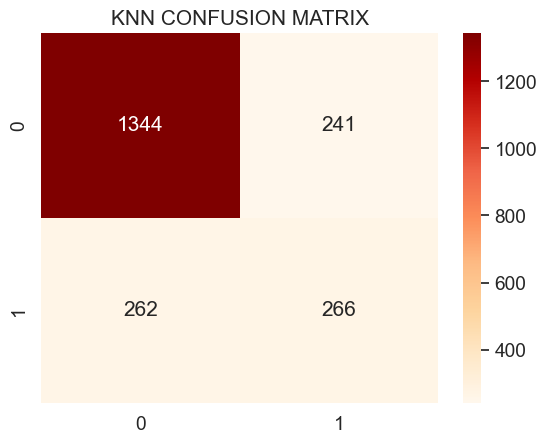

In [165]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d",cmap='OrRd')
plt.title("KNN CONFUSION MATRIX");

In [168]:
print("classification_report")
print(classification_report(y_test, y_pred))

classification_report
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1585
           1       0.52      0.50      0.51       528

    accuracy                           0.76      2113
   macro avg       0.68      0.68      0.68      2113
weighted avg       0.76      0.76      0.76      2113



## AdaBoost Classifier

In [123]:
model = make_pipeline(StandardScaler(), AdaBoostClassifier())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("AdaBoost Classifier accuracy :",accuracy)
#dump(model, 'AdaBoost_Classifier_model.pk')

AdaBoost Classifier accuracy : 0.8121154756270705


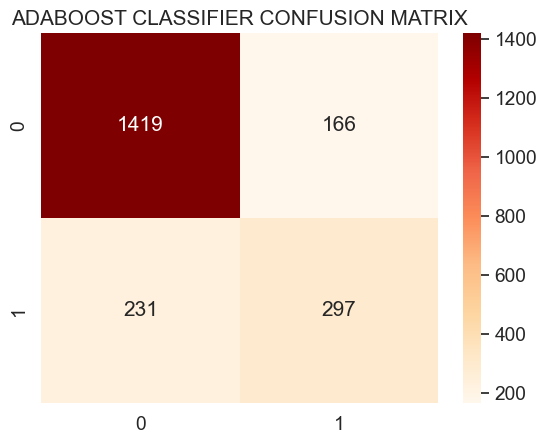

In [124]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d",cmap='OrRd')
plt.title("ADABOOST CLASSIFIER CONFUSION MATRIX");

In [125]:


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1585
           1       0.64      0.56      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.81      0.81      0.81      2113



## Gradient Boosting Classifier

In [154]:
model1 = make_pipeline(StandardScaler(), GradientBoostingClassifier())
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, y_pred))
#dump(model1, 'model/churn.jb'
import pickle
import joblib
filename = 'churn.sav'
joblib.dump(model1, filename)
loaded_model = pickle.load(open(filename, 'rb'))

Gradient Boosting Classifier 0.8106956933270232


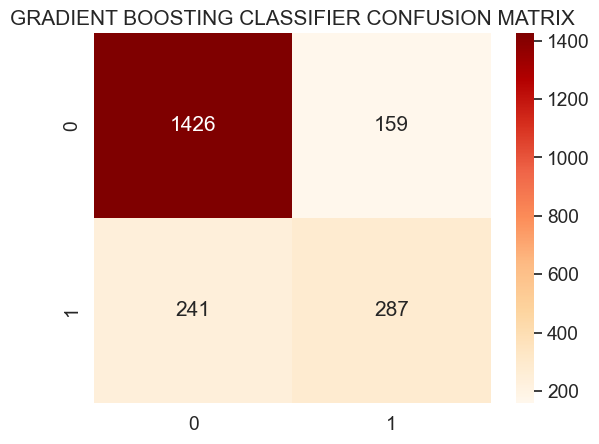

In [155]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True, fmt = "d",cmap='OrRd')
plt.title("GRADIENT BOOSTING CLASSIFIER CONFUSION MATRIX");

In [161]:
print("classification_report")
print(classification_report(y_test, y_pred))

classification_report
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1585
           1       0.64      0.54      0.59       528

    accuracy                           0.81      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.81      0.81      2113



## Extra Tree Classifier

In [128]:
model = make_pipeline(StandardScaler(), ExtraTreesClassifier())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Extra Trees Classifier Score :", accuracy_score(y_test, y_pred))
#dump(model, 'extra_tree_model.pk')

Extra Trees Classifier Score : 0.783719829626124


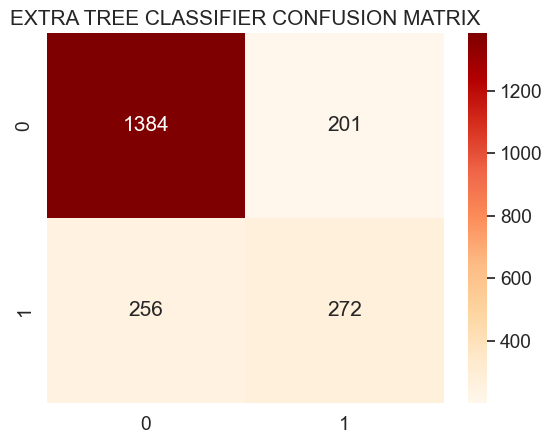

In [129]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("EXTRA TREE CLASSIFIER CONFUSION MATRIX");

In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1585
           1       0.58      0.52      0.54       528

    accuracy                           0.78      2113
   macro avg       0.71      0.69      0.70      2113
weighted avg       0.78      0.78      0.78      2113

